### TUGAS PRAKTIKUM

#### Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah yang terbaik.
4. Buatlah implementasi model SOM untuk segmentasi citra lain

- Menggunakan data 'Mall_Customer.csv'

In [2]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


Encoding Gender

In [5]:
from sklearn.calibration import LabelEncoder

labelencoder=LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


- Clustering Fitur

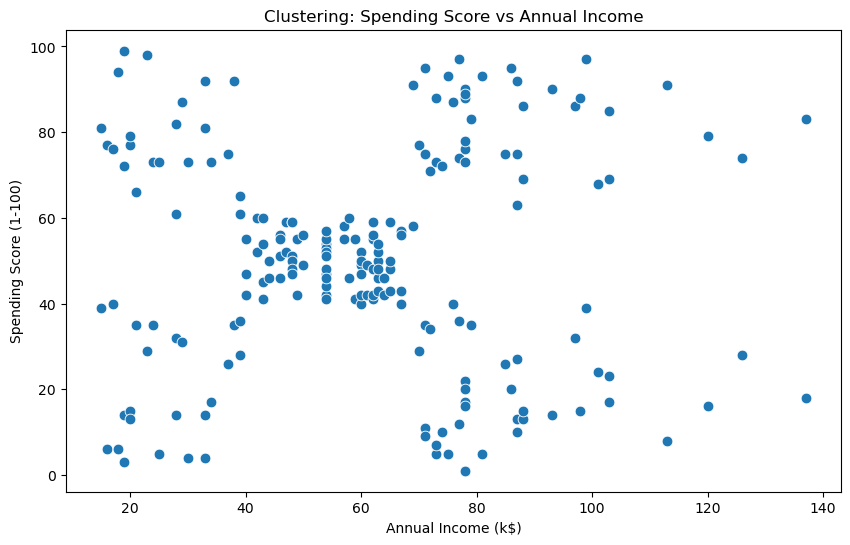

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Memilih dua fitur untuk analisis
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Menentukan jumlah cluster (misalnya, 5 cluster)
num_clusters = 5

# Melakukan clustering menggunakan KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Menambahkan kolom 'Cluster' ke DataFrame
df['Cluster'] = kmeans.labels_

# Menampilkan scatter plot dengan pemisahan warna berdasarkan cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, s=60, palette='Set1')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering: Spending Score vs Annual Income')
plt.show()

- Buat Model K-Means

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


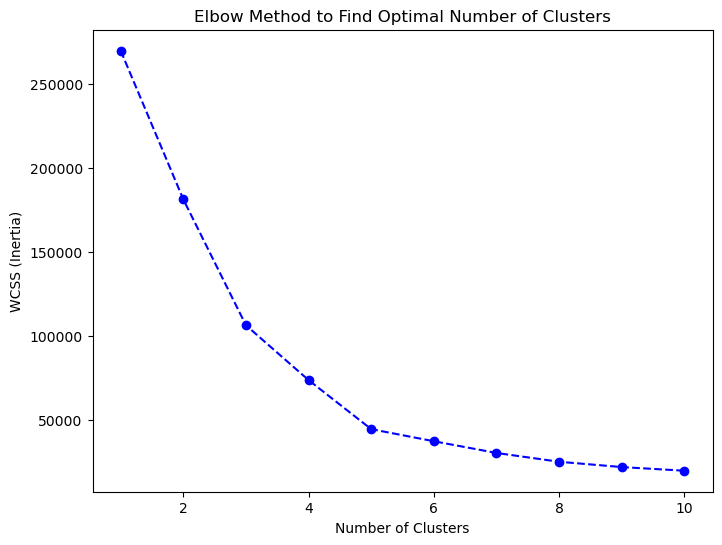

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Memilih dua fitur untuk analisis
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Menentukan jumlah cluster terbaik dengan menggunakan elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Menampilkan elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method to Find Optimal Number of Clusters')
plt.show()


In [9]:
from sklearn.cluster import KMeans

# Memilih dua fitur untuk analisis
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Inisialisasi K-Means dengan jumlah cluster yang diinginkan
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Melakukan clustering dan mendapatkan label-cluster
df["label"] = kmeans.fit_predict(X)

# Output DataFrame dengan label-cluster
print(df.head())



   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   Cluster  label  
0        2      2  
1        3      3  
2        2      2  
3        3      3  
4        2      2  


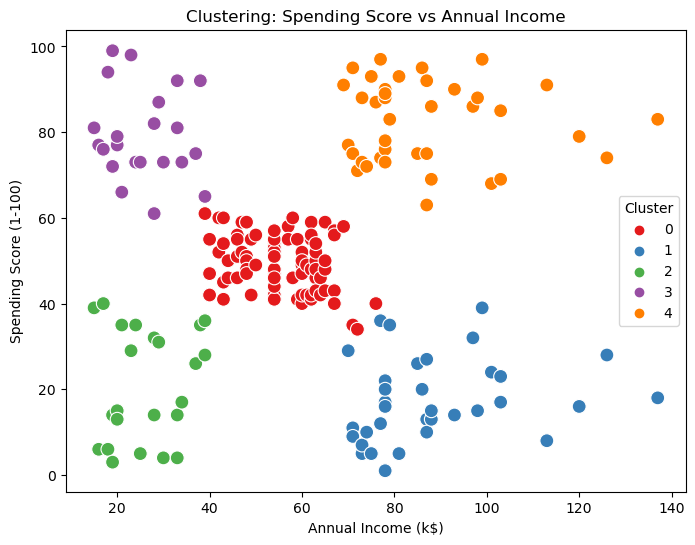

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat scatter plot dari cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering: Spending Score vs Annual Income')
plt.show()

Dari gambar diatas dataset Mall_Customers sudah terbentuk 5 clusters yang berbeda. Cluster berwarna biru menandakan pelanggan yang memiliki skor pendapatan dan pengeluaran paling sedikit. Sedangkan oranye merupakan pelanggan dengan skor pendapatan dan pengeluaran terbanyak

Seleksi Fitur

In [11]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X)
X_train_std

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148,  0.30986936],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407,  0.94877527],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298,  0.30986936],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783,  0.94877527],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992,  0.30986936],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627,  0.94877527],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298,  0.30986936],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436,  0.94877527],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767,  0.30986936],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002,  0.94877527],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ,  0.30986936],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216,  0.94877527],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894,  0.30986936],
       [-0.88640526, -1.06573534, -1.5

- Buat Segmentasi Citra dengan Metode Self-Organizing Map (SOM)

In [13]:
pip install minisom

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [15]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [16]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [17]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [18]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [19]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [20]:
# Load citra
img_path = "../img/kitten01.jpg"
img = io.imread(img_path) / 255.0
plt.imshow(img)
plt.axis('off')

FileNotFoundError: No such file: 'c:\Users\Rafysp\Documents\Semester 5\Machine Learning\img\kitten01.jpg'

In [ ]:
# Latih SOM
num_epochs = 50
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(img, num_epochs, initial_learning_rate, initial_neighborhood_radius)

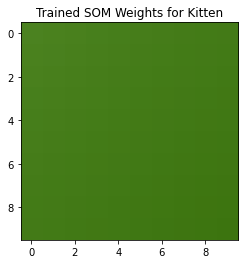

In [ ]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Kitten')
plt.show()